# aSPEM Experiment : defining a protocol




In [15]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import os
if not os.path.exists('figures/Experiment'):
    os.makedirs('figures/Experiment')

In [17]:
msfigpath = '../PasturelMontagniniPerrinet2019/figures'
observer = 'LB'
mode = 'enregistrement'
exts = ['.png', '.svg', '.pdf']
from  aSPEM import Analysis
e = Analysis() #observer=observer, mode=mode)

from aSPEM import binomial_motion

/!\ Le fichier Delete n'existe pas pour fct_velocity_2_step_False_whitening !


sujet = OP


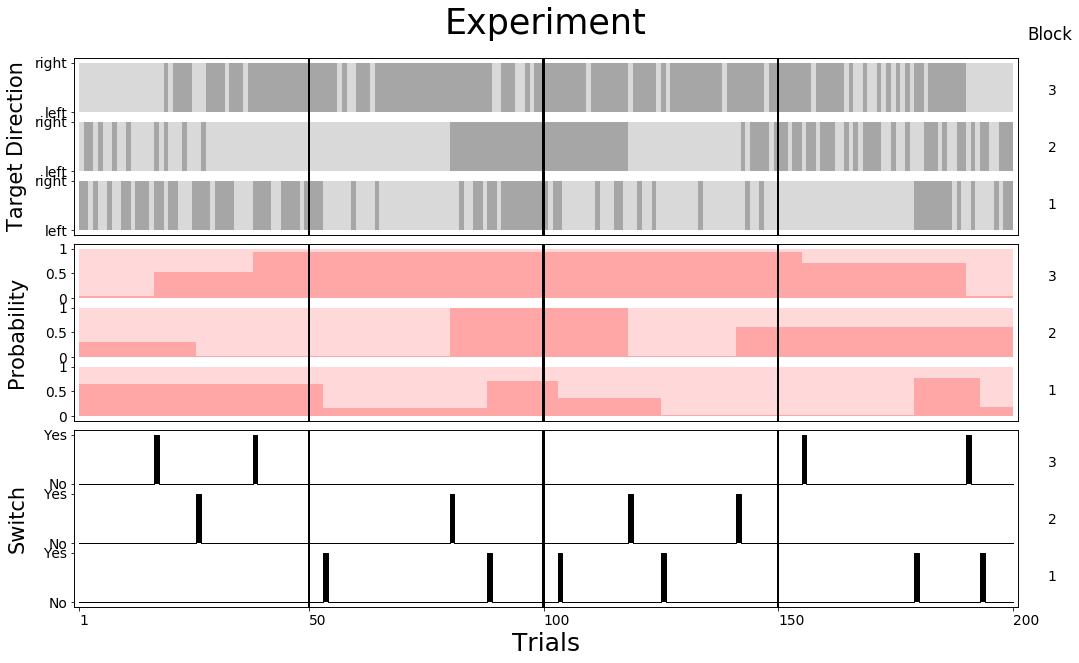

In [18]:
fig, axs = e.plot_experiment()
for ext in exts: fig.savefig('figures/Experiment/Experiment_randomblock' + ext, dpi=400)

In [31]:
figname = '1_A_Experiment_randomblock'

sujet = OP


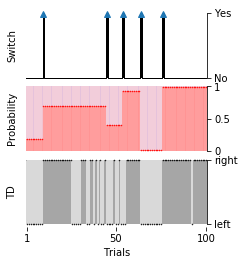

In [146]:
N_trials = 200
trials, p = binomial_motion(N_trials=N_trials, N_blocks=1, tau=40, seed=42, Jeffreys=True, N_layer=3)

fig, axs = plt.subplots(3, 1, figsize=(3.4, 3.4))
fig, axs = e.plot_experiment(num_block=[0], p=p, fig=fig, axs=axs[::-1], 
                             t_label=12, titre=None, mode='planter les choux', pause=0, TD=True, ec = 0.15)

#axs[0].fill_between(range(N_trials), p[:, 0, 0], lw=.5, alpha=alpha[0][0], facecolor=color[0][0], step='pre')

mask = np.ones(N_trials)
mask[p[:, 0, -1]==0] *= np.nan
axs[-1].plot(np.arange(N_trials)-.5, mask-.02, '^')
#axs[-1].vlines(range(N_trials), 0, p[:, 0, -1] + mask)

axs[1].vlines(np.arange(N_trials)-.5, 0, p[:, 0, 1], lw=.1, color='r')
axs[1].vlines(np.arange(N_trials)-.5, 1, p[:, 0, 1], lw=.1, color='b')
axs[1].plot(np.arange(N_trials)-.5, p[:, 0, 1], 'r.', ms=1)


axs[0].plot(np.arange(N_trials)-.5, p[:, 0, 0], 'k.', ms=1)

axs[0].set_xticks(axs[-1].get_xticks()+.5)
axs[0].set_xticklabels(axs[-1].get_xticklabels())
axs[-1].set_xticks(axs[1].get_xticks())
axs[-1].set_xticklabels(axs[1].get_xticklabels())
axs[0].set_xlabel(axs[-1].get_xlabel())
offset = .04
for ax in axs: 
    ax.set_xlim(0, 100)
    ax.set_ylim(-offset, 1+offset)
    #ax.axis('off')
    for card in ['left', 'top', 'bottom']:
        ax.spines[card].set_visible(False)
        ax.spines[card].set_bounds(0, 1)
    ax.spines['right'].set_bounds(0, 1)
    ax.spines['right'].set_position(('axes', 1.0))
#axs[-1].set_ylim(0, 1.1)
for ext in exts: fig.savefig(f'{msfigpath}/{figname}' + ext, dpi=400, bbox_inches='tight', pad_inches=0)
plt.show()    

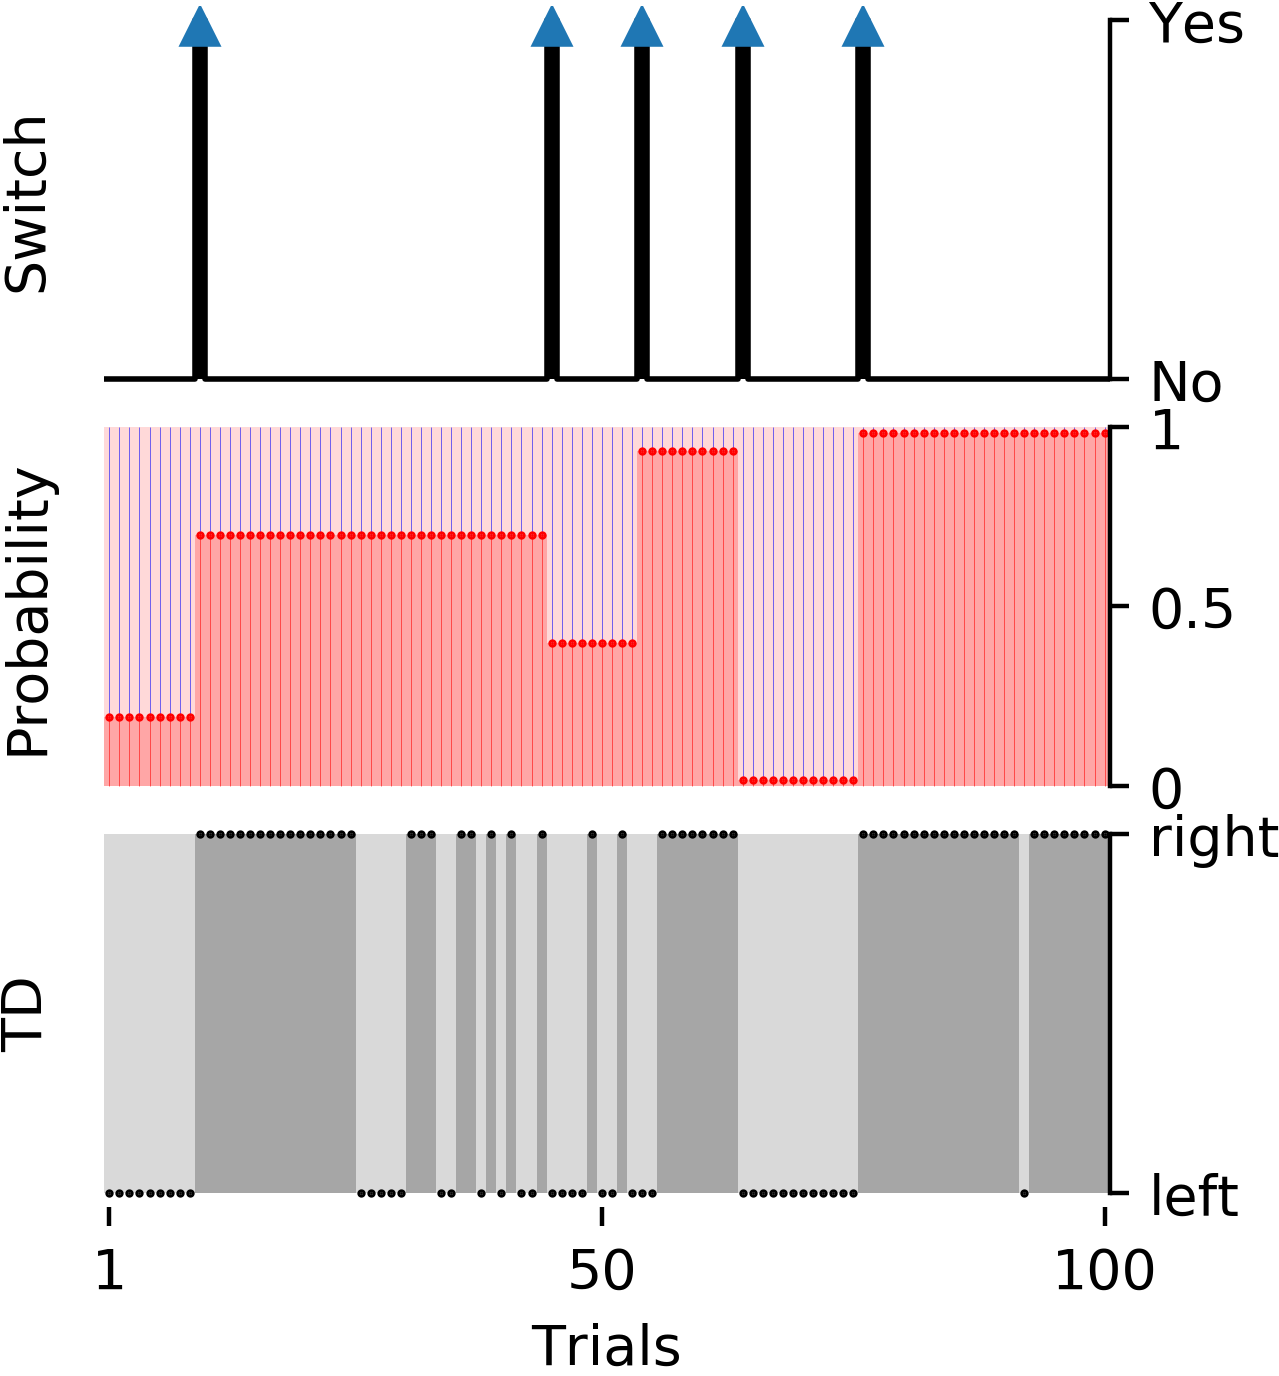

In [147]:
from IPython.display import Image
Image(f'{msfigpath}/{figname}.png')

sujet = OP


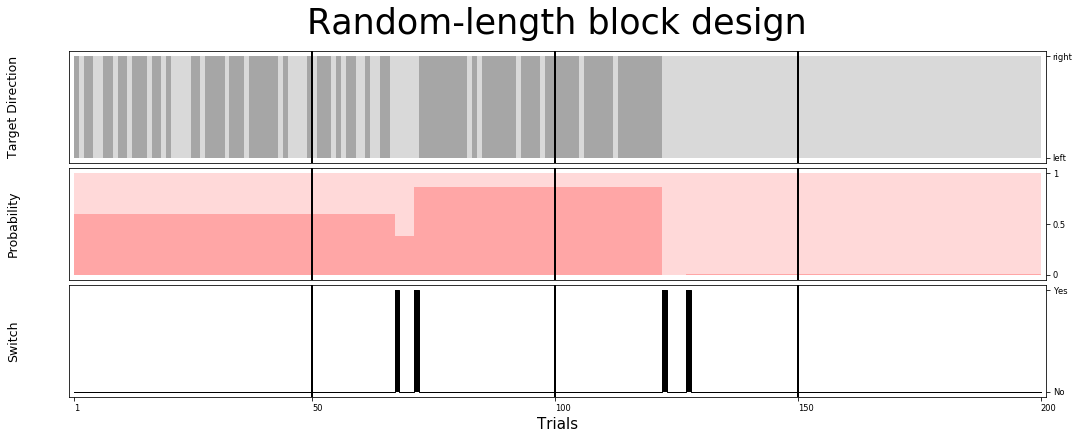

sujet = OP


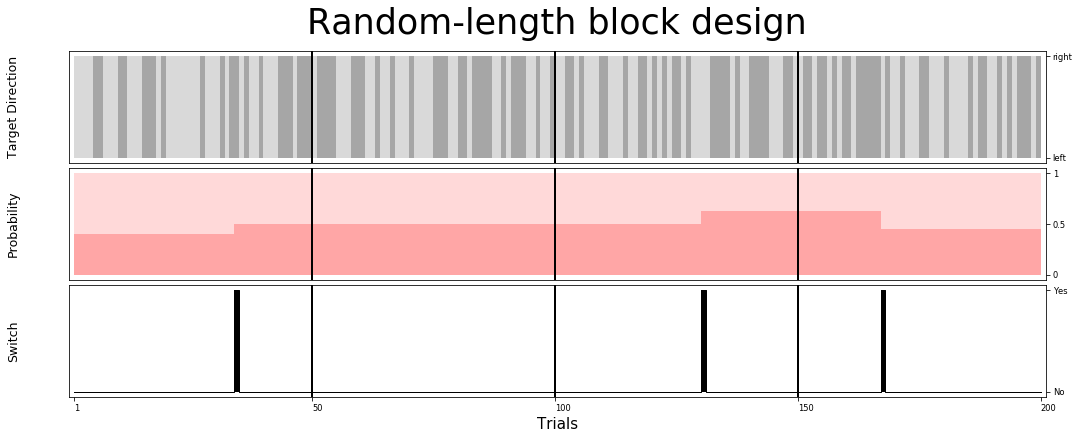

sujet = OP


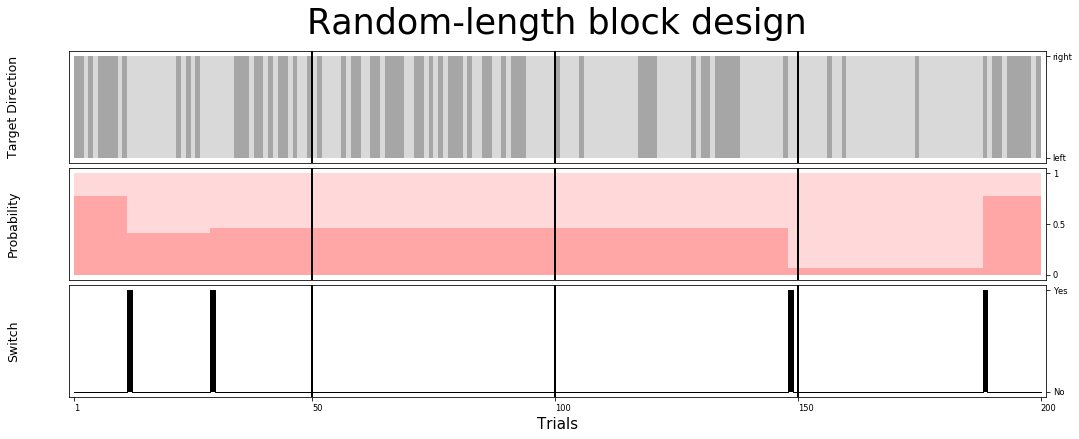

sujet = OP


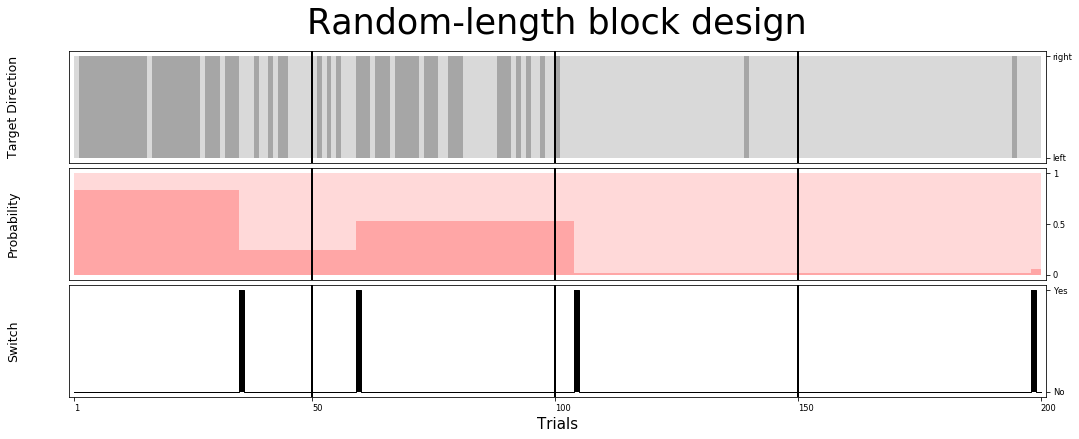

In [122]:
for i in range(4):
    trials, p = binomial_motion(N_trials=200, N_blocks=1, tau=50, seed=1515+i, Jeffreys=True, N_layer=3)

    fig, axs = plt.subplots(3, 1, figsize=(15, 15/(1.6180*1.5)))
    fig, axs = e.plot_experiment(num_block=[0], p=p, fig=fig, axs=axs, t_titre=35, t_label=15, titre='Random-length block design')
    for ext in exts: fig.savefig('figures/Experiment/Experiment_randomblock_' + str(i) + ext, dpi=400)
    plt.show()
    

sujet = OP


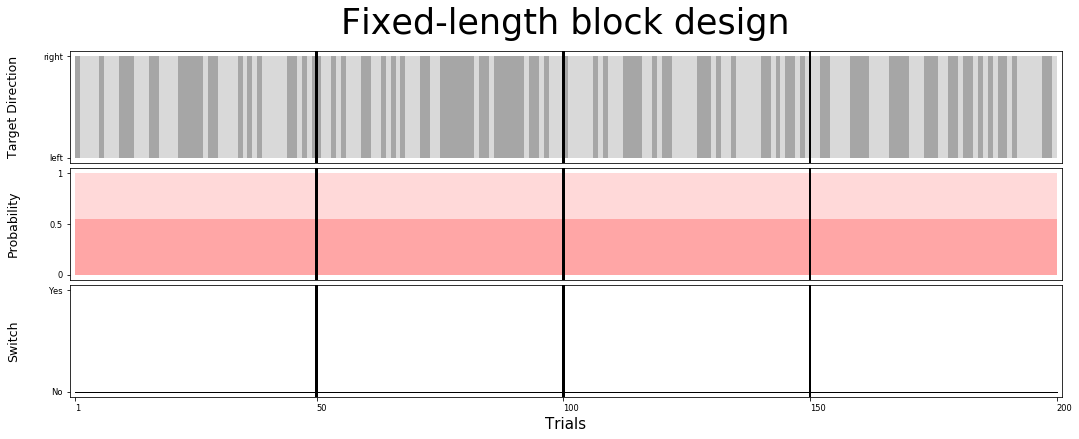

sujet = OP


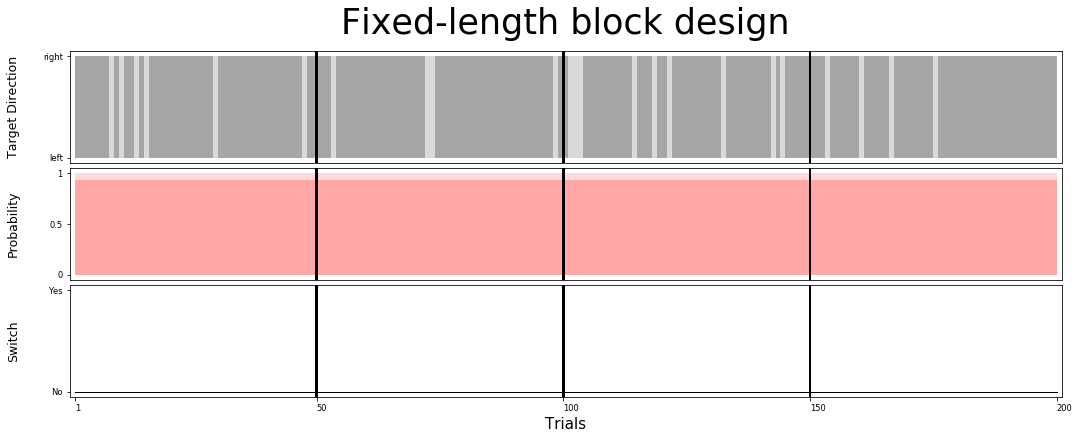

sujet = OP


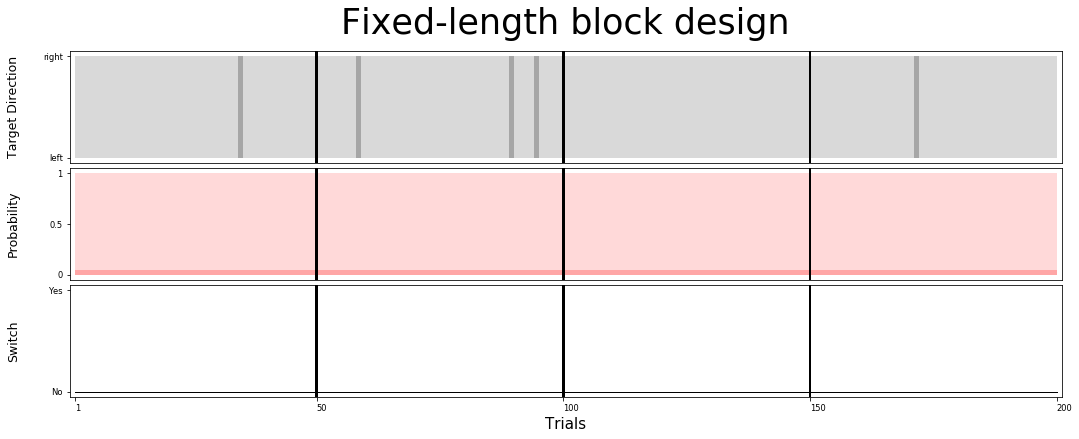

sujet = OP


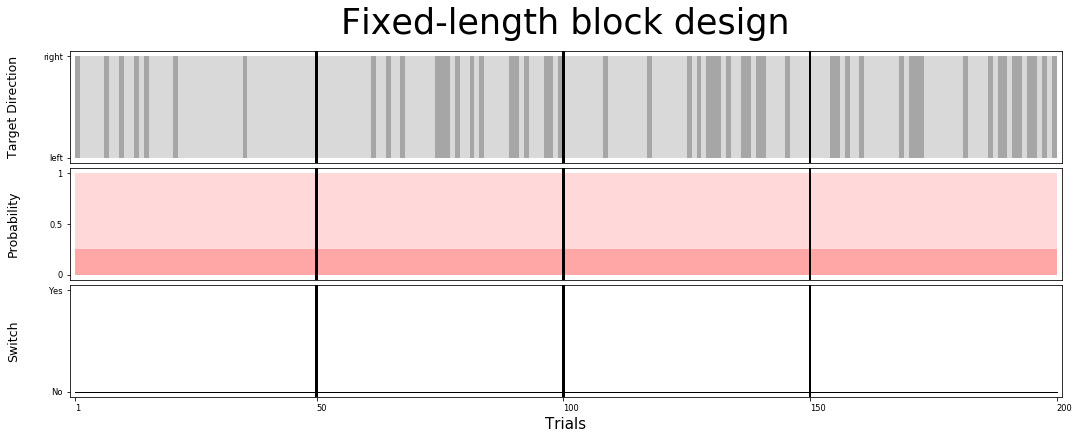

In [8]:
for i in range(4):
    trials, p = binomial_motion(200, 1, 500000, 1973+i, Jeffreys=True, N_layer=3)

    fig, axs = plt.subplots(3, 1, figsize=(15, 15/(1.6180*1.5)))
    fig, axs = e.plot_experiment(num_block=[0], p=p, fig=fig, axs=axs, t_titre=35, t_label=15, titre='Fixed-length block design')
    for ext in exts: fig.savefig('figures/Experiment/Experiment_classique_' + str(i) + ext, dpi=400)
    plt.show()


sujet = OP


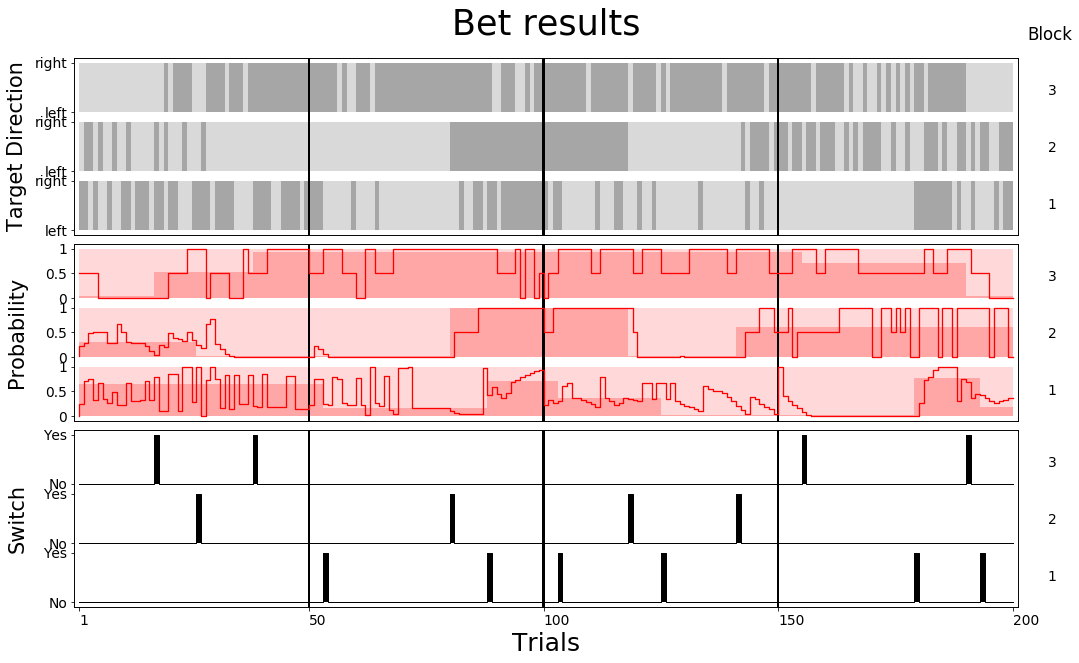

In [9]:
fig, axs = e.plot_experiment(mode='pari')
for ext in exts: fig.savefig('figures/Experiment/Experiment_randomblock_bet' + ext, dpi=400)

sujet = OP


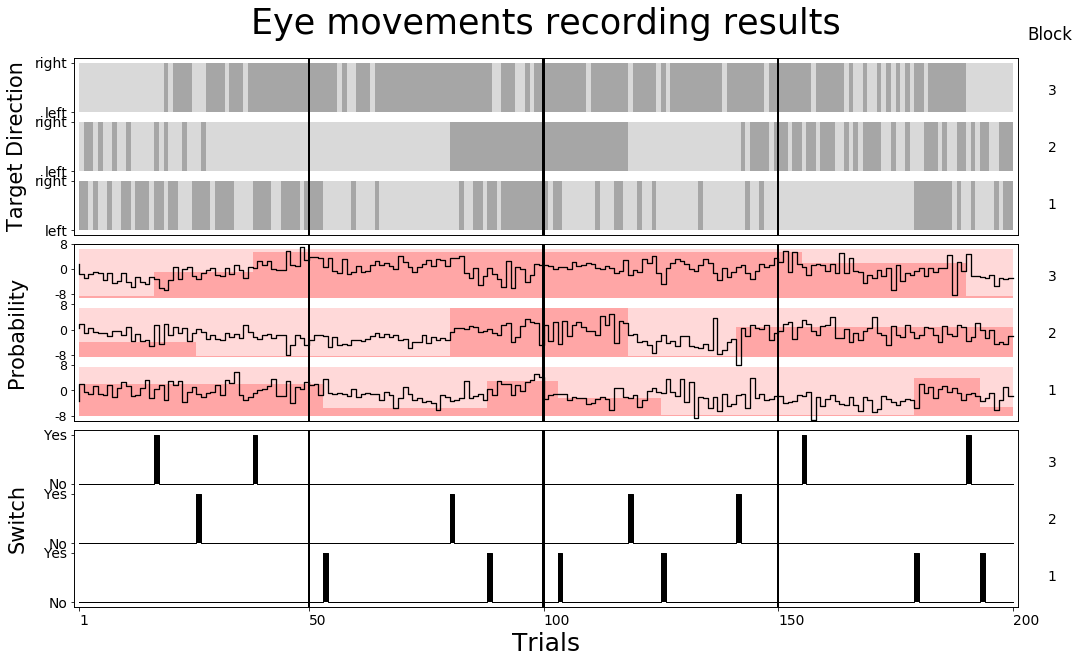

In [10]:
fig, axs = e.plot_experiment(mode='enregistrement')
for ext in exts: fig.savefig('figures/Experiment/Experiment_randomblock_EM' + ext, dpi=400)

sujet = OP


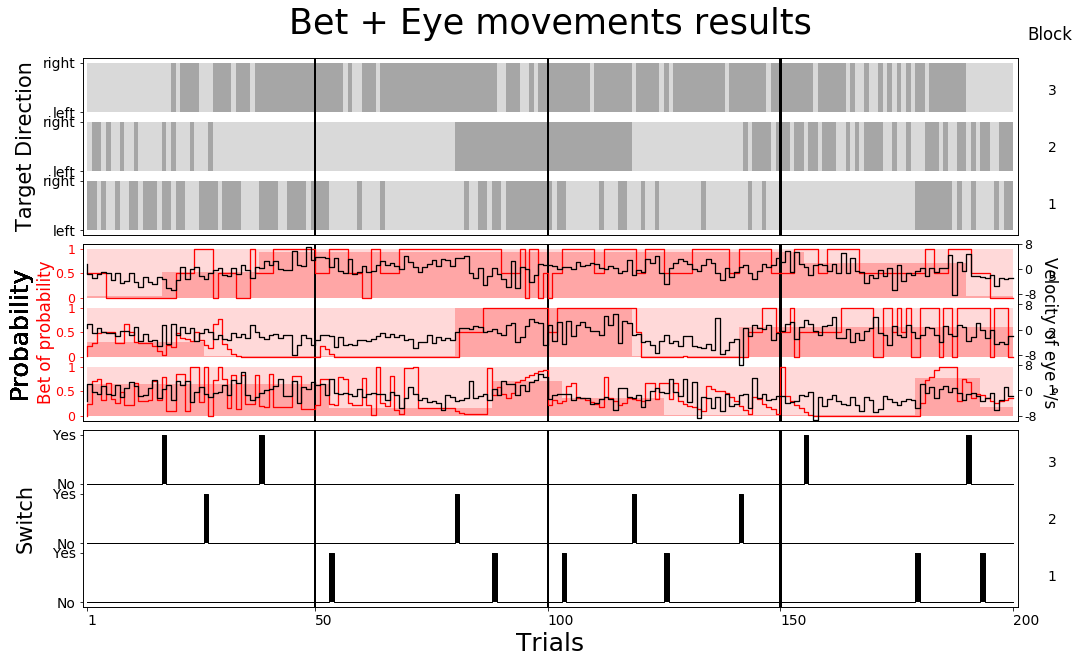

In [11]:
fig, axs = e.plot_experiment(mode='deux')
for ext in exts: fig.savefig('figures/Experiment/Experiment_randomblock_bet_EM' + ext, dpi=400)

sujet 0 = AM
sujet 6 = BMC
sujet 10 = CS
sujet 5 = DC


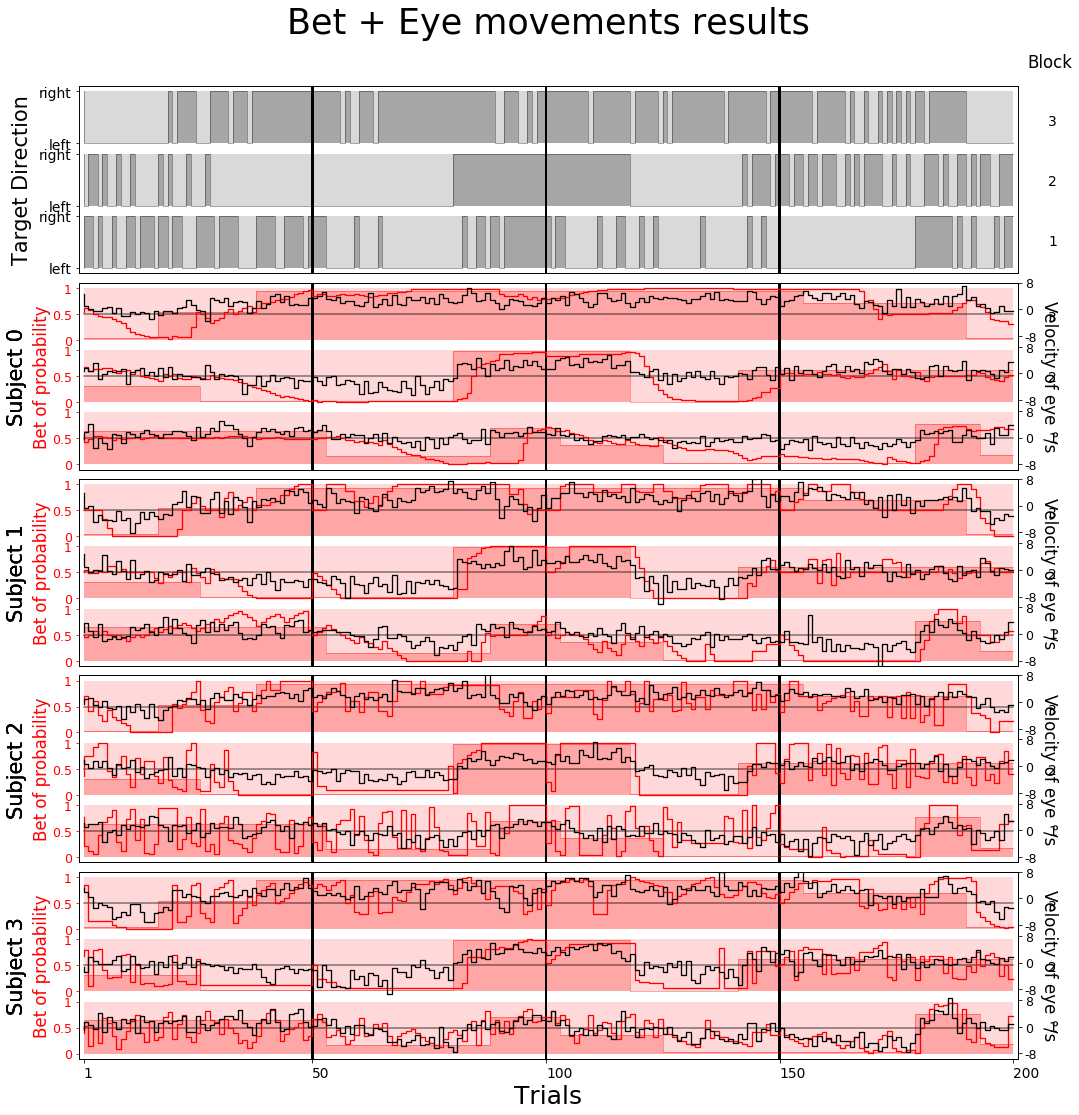

In [12]:
sujet = [0, 6, 10, 5]
fig, axs = e.plot_experiment(sujet=sujet, mode='deux')

sujet 0 = AM
sujet 6 = BMC


/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


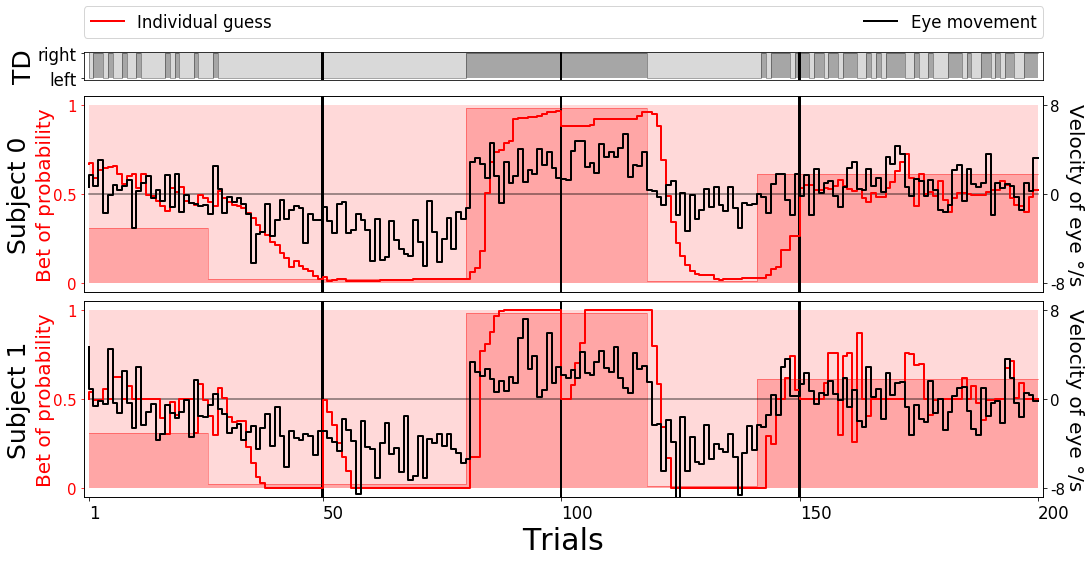

In [13]:
sujet = [0, 6]
#fig, axs = e.plot_experiment(sujet=sujet, mode='deux', num_block=[1], titre='', lw=2, legends=True)
fig, axs = e.plot_experiment(sujet=sujet, mode='deux', num_block=[1], titre='', t_label=30, lw=2, legends=True, TD=True)
for ext in exts: fig.savefig(f'{msfigpath}/2_results_enregistrement' + ext, dpi=400)

sujet 0 = AM
sujet 6 = BMC


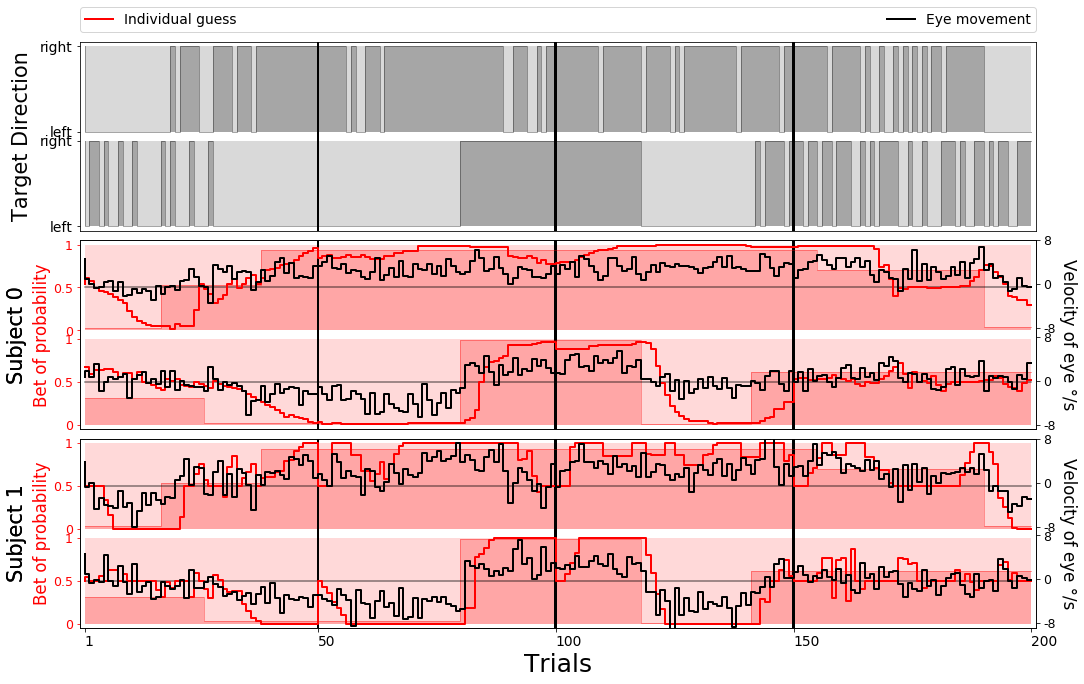

In [14]:
sujet = [0, 6]
fig, axs = e.plot_experiment(sujet=sujet, mode='deux', num_block=[1,2], titre='', lw=2, legends=True)